<a href="https://colab.research.google.com/github/dattali18/statistics_msc_course/blob/main/project/code/task_4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression



In [17]:
DATA_PATH = "https://github.com/dattali18/statistics_msc_course/blob/main/project/data/wine_dataset_assignment.csv?raw=true"

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv(DATA_PATH)

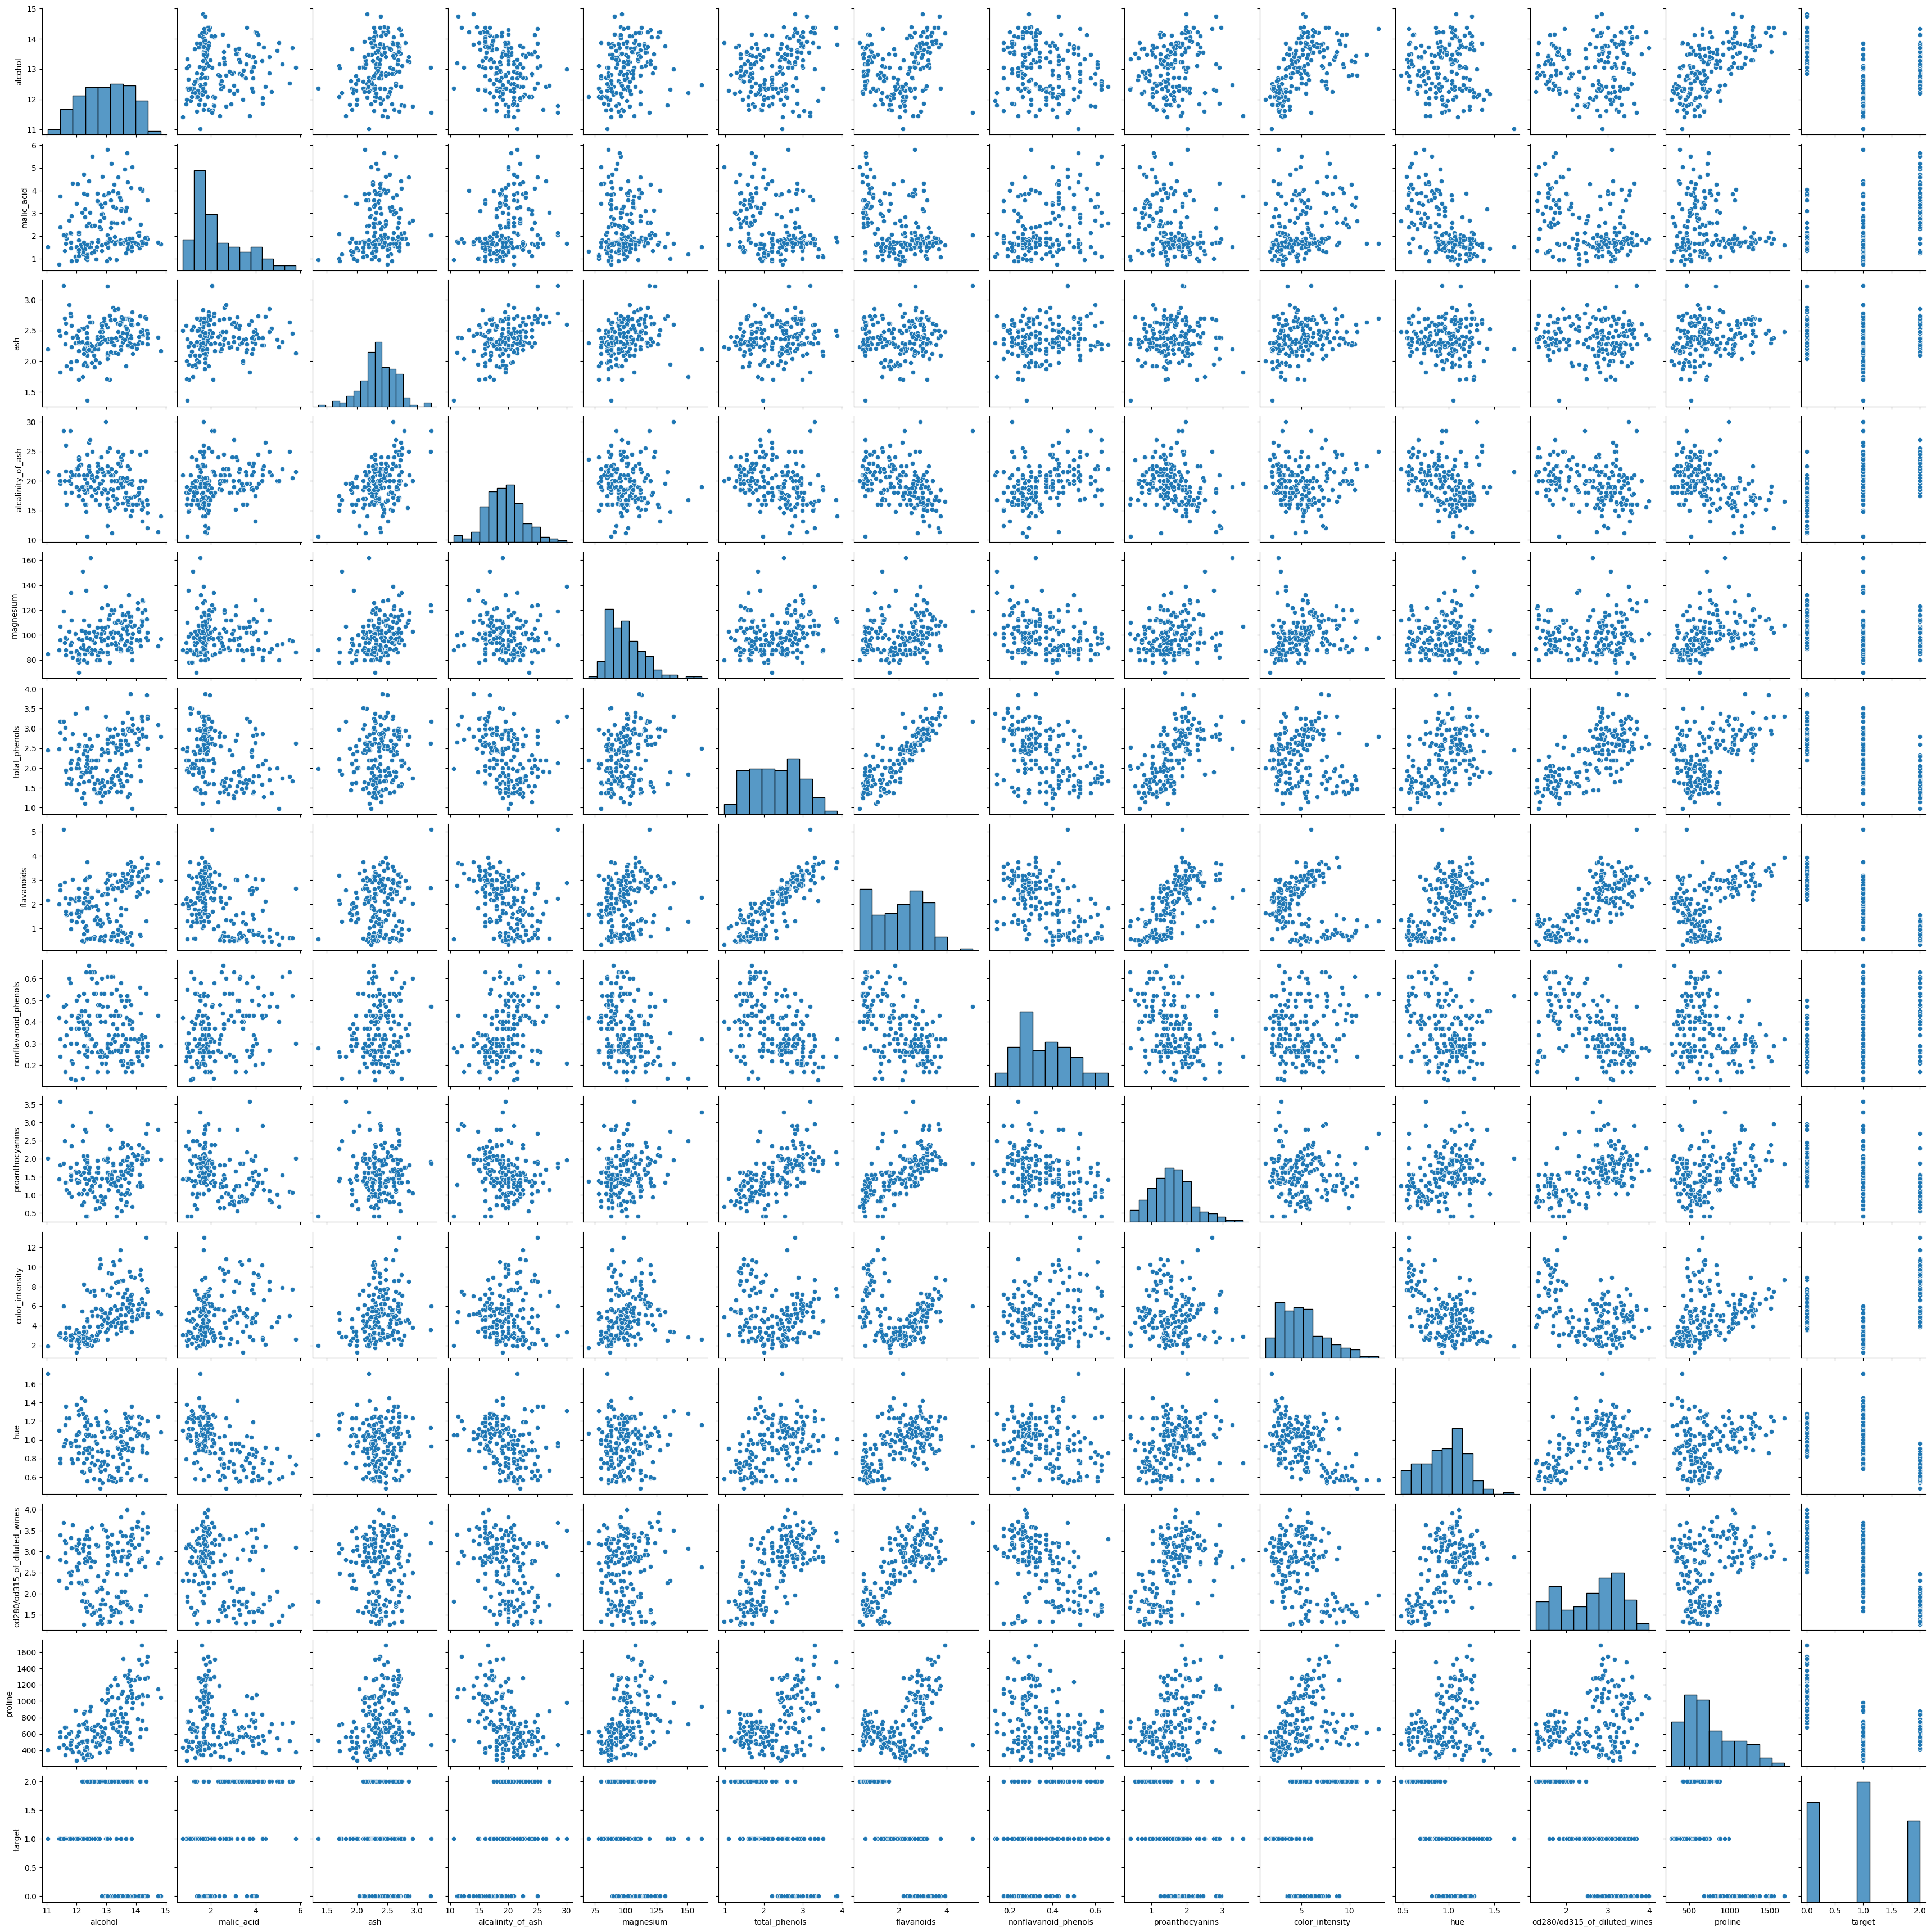

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

In [21]:
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr(method='pearson')

print("Pearson Correlation Coefficients for each pair of variables:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.loc[col1, col2]
        print(f"  {col1} vs {col2}: {correlation:.4f}")

Pearson Correlation Coefficients for each pair of variables:
  alcohol vs malic_acid: 0.0944
  alcohol vs ash: 0.2115
  alcohol vs alcalinity_of_ash: -0.3102
  alcohol vs magnesium: 0.2708
  alcohol vs total_phenols: 0.2891
  alcohol vs flavanoids: 0.2368
  alcohol vs nonflavanoid_phenols: -0.1559
  alcohol vs proanthocyanins: 0.1367
  alcohol vs color_intensity: 0.5464
  alcohol vs hue: -0.0717
  alcohol vs od280/od315_of_diluted_wines: 0.0723
  alcohol vs proline: 0.6437
  alcohol vs target: -0.3282
  malic_acid vs ash: 0.1640
  malic_acid vs alcalinity_of_ash: 0.2885
  malic_acid vs magnesium: -0.0546
  malic_acid vs total_phenols: -0.3352
  malic_acid vs flavanoids: -0.4110
  malic_acid vs nonflavanoid_phenols: 0.2930
  malic_acid vs proanthocyanins: -0.2207
  malic_acid vs color_intensity: 0.2490
  malic_acid vs hue: -0.5613
  malic_acid vs od280/od315_of_diluted_wines: -0.3687
  malic_acid vs proline: -0.1920
  malic_acid vs target: 0.4378
  ash vs alcalinity_of_ash: 0.4434
  ash

In [22]:
correlation_pairs = []

# Iterate through the upper triangle of the correlation matrix to get unique pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.loc[col1, col2]
        correlation_pairs.append((correlation, col1, col2))

# Sort the pairs by the absolute value of correlation in descending order
correlation_pairs.sort(key=lambda x: abs(x[0]), reverse=True)

print("Top 10 Most Correlated Column Pairs:")
for corr, col1, col2 in correlation_pairs[:10]:
    print(f"  {col1} vs {col2}: {corr:.4f}")

Top 10 Most Correlated Column Pairs:
  total_phenols vs flavanoids: 0.8646
  flavanoids vs target: -0.8475
  od280/od315_of_diluted_wines vs target: -0.7882
  flavanoids vs od280/od315_of_diluted_wines: 0.7872
  total_phenols vs target: -0.7192
  total_phenols vs od280/od315_of_diluted_wines: 0.6999
  flavanoids vs proanthocyanins: 0.6527
  alcohol vs proline: 0.6437
  proline vs target: -0.6337
  hue vs target: -0.6174


create a linear regression model for `total_phenols` vs `flavanoids` find the $\beta_0, \beta_1$ parameters using statistics mathod

In [27]:
import numpy as np

# Define the independent (X) and dependent (Y) variables
X = numeric_data['flavanoids']
Y = numeric_data['total_phenols']

X = np.array(X)
Y = np.array(Y)
# Calculate means
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Calculate beta_1 (slope)
# Beta_1 = Sum((Xi - mean_X) * (Yi - mean_Y)) / Sum((Xi - mean_X)^2)
numerator = np.sum((X - mean_X) * (Y - mean_Y))
denominator = np.sum((X - mean_X)**2)

# Handle the case where the denominator might be zero (if all X values are the same, which is unlikely here)
if denominator == 0:
    beta_1 = 0 # Or handle as an error, but for X vs X, this shouldn't happen with varied data
else:
    beta_1 = numerator / denominator

# Calculate beta_0 (intercept)
# Beta_0 = mean_Y - beta_1 * mean_X
beta_0 = mean_Y - beta_1 * mean_X

print(f"For a linear regression model of total_phenols vs total_phenols:")
print(f"  β0 (Intercept): {beta_0:.4f}")
print(f"  β1 (Slope): {beta_1:.4f}")

For a linear regression model of total_phenols vs total_phenols:
  β0 (Intercept): 1.1958
  β1 (Slope): 0.5417


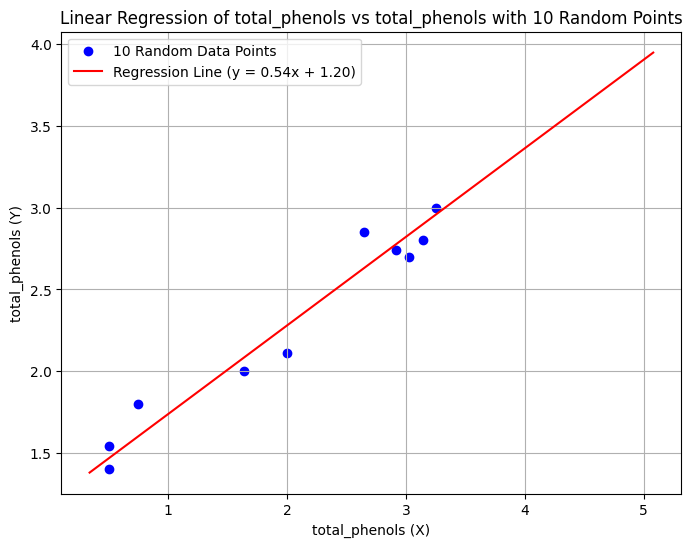

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Independent and Dependent variables as used in the previous regression
X_plot = numeric_data['flavanoids']
Y_plot = numeric_data['total_phenols']

# Get the parameters from the previous calculation (beta_0 and beta_1)
# If these variables are not directly accessible, they would need to be re-calculated or explicitly passed.
# Based on the kernel state, beta_0 and beta_1 are available.

# Generate points for the regression line
x_line = np.linspace(X_plot.min(), X_plot.max(), 100)
y_line = beta_0 + beta_1 * x_line

# Take a random subset of 10 points from the original data
np.random.seed(42) # for reproducibility
random_indices = np.random.choice(len(numeric_data), 10, replace=False)
subset_X = X_plot.iloc[random_indices]
subset_Y = Y_plot.iloc[random_indices]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(subset_X, subset_Y, color='blue', label='10 Random Data Points')
plt.plot(x_line, y_line, color='red', label=f'Regression Line (y = {beta_1:.2f}x + {beta_0:.2f})')
plt.title('Linear Regression of total_phenols vs total_phenols with 10 Random Points')
plt.xlabel('total_phenols (X)')
plt.ylabel('total_phenols (Y)')
plt.legend()
plt.grid(True)
plt.show()

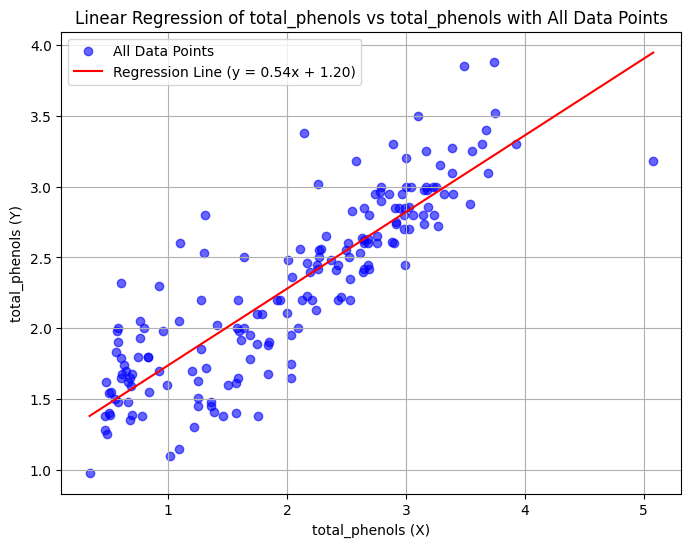

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Independent and Dependent variables as used in the previous regression
X_plot = numeric_data['flavanoids']
Y_plot = numeric_data['total_phenols']

# Get the parameters from the previous calculation (beta_0 and beta_1)
# These are already available in the kernel: beta_0 and beta_1

# Generate points for the regression line
x_line = np.linspace(X_plot.min(), X_plot.max(), 100)
y_line = beta_0 + beta_1 * x_line

# Create the plot using ALL data points
plt.figure(figsize=(8, 6))
plt.scatter(X_plot, Y_plot, color='blue', label='All Data Points', alpha=0.6)
plt.plot(x_line, y_line, color='red', label=f'Regression Line (y = {beta_1:.2f}x + {beta_0:.2f})')
plt.title('Linear Regression of total_phenols vs total_phenols with All Data Points')
plt.xlabel('total_phenols (X)')
plt.ylabel('total_phenols (Y)')
plt.legend()
plt.grid(True)
plt.show()

Test the model against 3 random variable

In [32]:
import numpy as np

# Select three random rows from the numeric_data DataFrame
random_rows_for_prediction = numeric_data.sample(n=3, random_state=42)

print("Actual vs. Predicted total_phenols for selected random rows:")
for index, row in random_rows_for_prediction.iterrows():
    actual_y = row['total_phenols']
    predicted_y = beta_0 + beta_1 * row['flavanoids']
    print(f"  Row Index: {index}, Actual total_phenols: {actual_y:.4f}, Predicted total_phenols: {predicted_y:.4f}")

Actual vs. Predicted total_phenols for selected random rows:
  Row Index: 19, Actual total_phenols: 2.7000, Predicted total_phenols: 2.8372
  Row Index: 45, Actual total_phenols: 2.8500, Predicted total_phenols: 2.6314
  Row Index: 140, Actual total_phenols: 1.5400, Predicted total_phenols: 1.4667


Test the significance of the regression at significance levels: 10%, 5%, 1%

In [29]:
import statsmodels.api as sm

# Redefine X and Y for total_phenols vs total_phenols as per the previous regression calculation
X_significance = numeric_data['flavanoids']
Y_significance = numeric_data['total_phenols']

# Add a constant to the independent variable for the intercept term
X_significance = sm.add_constant(X_significance)

# Create and fit the OLS (Ordinary Least Squares) model
model = sm.OLS(Y_significance, X_significance)
results = model.fit()

# Print the regression summary
print(results.summary())

# Interpret the significance at specified levels
print("\n--- Significance Test Results ---")
print(f"For the independent variable 'total_phenols':")

p_value_X = results.pvalues[1] # p-value for the 'total_phenols' coefficient

print(f"  P-value for 'total_phenols' coefficient: {p_value_X:.4f}")

alpha_levels = {'10%': 0.10, '5%': 0.05, '1%': 0.01}

for label, alpha in alpha_levels.items():
    if p_value_X < alpha:
        print(f"  The coefficient for 'total_phenols' is statistically significant at the {label} level (p < {alpha}).")
    else:
        print(f"  The coefficient for 'total_phenols' is NOT statistically significant at the {label} level (p >= {alpha}).")

print("\n--- Overall Model Significance ---")
overall_p_value = results.f_pvalue
print(f"  Overall model F-statistic p-value: {overall_p_value:.4f}")

                            OLS Regression Results                            
Dep. Variable:          total_phenols   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     520.9
Date:                Thu, 15 Jan 2026   Prob (F-statistic):           1.76e-54
Time:                        12:37:43   Log-Likelihood:                -46.167
No. Observations:                 178   AIC:                             96.33
Df Residuals:                     176   BIC:                             102.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1958      0.054     22.289      0.0

/tmp/ipython-input-525039544.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_X = results.pvalues[1] # p-value for the 'total_phenols' coefficient


# Task
Select three random rows from `numeric_data` to predict the 'total_phenols' using the calculated linear regression parameters (`beta_0` and `beta_1`) and print the actual versus predicted 'total_phenols' for each selected row.

## Select Random Rows

### Subtask:
Select three random rows from the `numeric_data` DataFrame.


**Reasoning**:
To select three random rows from the `numeric_data` DataFrame, I will use the `.sample()` method with `n=3` and set `random_state=42` for reproducibility, storing the result in a new variable.



In [30]:
random_rows = numeric_data.sample(n=3, random_state=42)
print("Selected random rows:")
print(random_rows)

Selected random rows:
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
19     13.64        3.10  2.56               15.2      116.0           2.70   
45     14.21        4.04  2.44               18.9      111.0           2.85   
140    12.93        2.81  2.70               21.0       96.0           1.54   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
19         3.03                  0.17             1.66             5.10  0.96   
45         2.65                  0.30             1.25             5.24  0.87   
140        0.50                  0.53             0.75             4.60  0.77   

     od280/od315_of_diluted_wines  proline  target  
19                           3.36    845.0       0  
45                           3.33   1080.0       0  
140                          2.31    600.0       2  


**Reasoning**:
Now that the three random rows have been selected, the next step is to calculate the predicted 'total_phenols' for these rows using the previously derived linear regression parameters (beta_0 and beta_1) and then compare them with the actual values. This directly addresses the main task's requirement to 'predict the 'total_phenols' using the calculated linear regression parameters... and print the actual versus predicted 'total_phenols' for each selected row'.



In [31]:
predicted_total_phenols = beta_0 + beta_1 * random_rows['flavanoids']

print("Actual vs. Predicted total_phenols for selected random rows:")
for index, row in random_rows.iterrows():
    actual_y = row['total_phenols']
    predicted_y = beta_0 + beta_1 * row['flavanoids']
    print(f"  Row Index: {index}, Actual total_phenols: {actual_y:.4f}, Predicted total_phenols: {predicted_y:.4f}")

Actual vs. Predicted total_phenols for selected random rows:
  Row Index: 19, Actual total_phenols: 2.7000, Predicted total_phenols: 2.8372
  Row Index: 45, Actual total_phenols: 2.8500, Predicted total_phenols: 2.6314
  Row Index: 140, Actual total_phenols: 1.5400, Predicted total_phenols: 1.4667
